In [1]:
#ONLINE FRAUD DETECTION

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 

df=pd.read_csv(r'C:\Users\kharl\Downloads\onlinefraud(1).csv')

C:\Users\kharl\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\kharl\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\kharl\AppData\Local\Temp\ipykernel_12116\2695946109.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\kharl\anaconda3\

In [2]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.shape #rows->rows,col->feature

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.isnull().sum()  #there are none

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.nameOrig.value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [9]:
df.nameDest.value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

In [10]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [11]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [12]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [13]:
# 8213 frauds out of which only 16 were flagged


In [14]:
#FEATURE EXTRACTION

In [15]:
#feature indicating balance changes


df['balance_change_org'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']


In [16]:
print(df[['step', 'type', 'amount', 'balance_change_org', 'balance_change_dest','isFraud']].head())

   step      type    amount  balance_change_org  balance_change_dest  isFraud
0     1   PAYMENT   9839.64            -9839.64                  0.0        0
1     1   PAYMENT   1864.28            -1864.28                  0.0        0
2     1  TRANSFER    181.00             -181.00                  0.0        1
3     1  CASH_OUT    181.00             -181.00             -21182.0        1
4     1   PAYMENT  11668.14           -11668.14                  0.0        0


In [17]:
#relative balance changes.

df['rel_balance_change_org'] = df['balance_change_org'] / df['oldbalanceOrg']
df['rel_balance_change_dest'] = df['balance_change_dest'] / df['oldbalanceDest']


In [18]:
print(df[['step', 'type', 'amount', 'rel_balance_change_org', 'rel_balance_change_dest','isFraud']].head())

   step      type    amount  rel_balance_change_org  rel_balance_change_dest  \
0     1   PAYMENT   9839.64               -0.057834                      NaN   
1     1   PAYMENT   1864.28               -0.087735                      NaN   
2     1  TRANSFER    181.00               -1.000000                      NaN   
3     1  CASH_OUT    181.00               -1.000000                     -1.0   
4     1   PAYMENT  11668.14               -0.280795                      NaN   

   isFraud  
0        0  
1        0  
2        1  
3        1  
4        0  


In [19]:
####EDA

In [20]:
import matplotlib.pyplot as plt


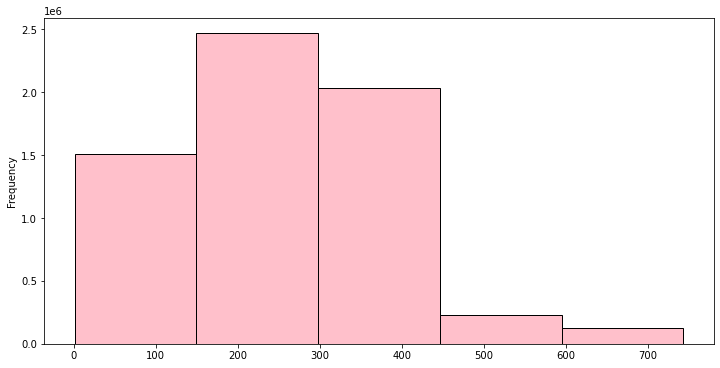

In [21]:
plt.xlabel('step')
df['step'].plot(kind='hist', bins=5, figsize=(12,6), facecolor='pink',edgecolor='black')
plt.show()

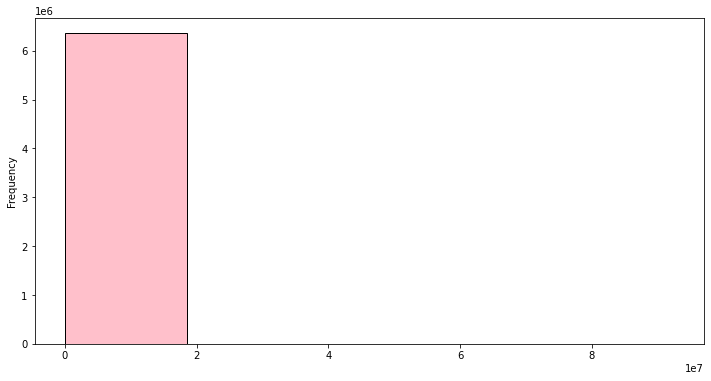

In [22]:

plt.xlabel('amount')
df['amount'].plot(kind='hist', bins=5, figsize=(12,6), facecolor='pink',edgecolor='black')
plt.show()

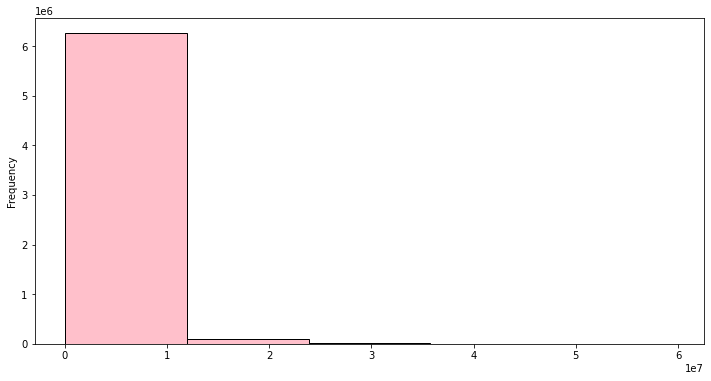

In [23]:

plt.xlabel('oldbalanceOrg')
df['oldbalanceOrg'].plot(kind='hist', bins=5, figsize=(12,6), facecolor='pink',edgecolor='black')
plt.show()

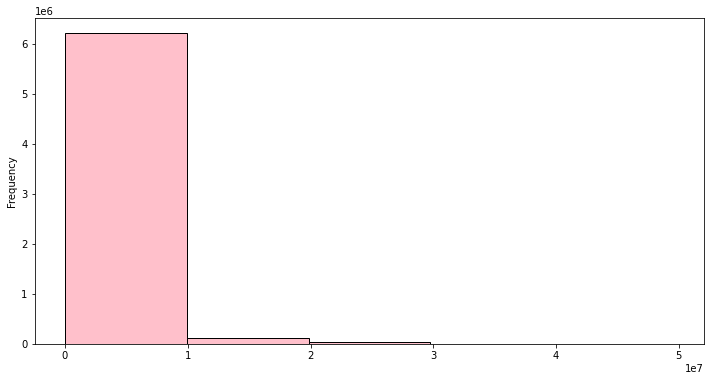

In [24]:
plt.xlabel('newbalanceOrig')
df['newbalanceOrig'].plot(kind='hist', bins=5, figsize=(12,6), facecolor='pink',edgecolor='black')
plt.show()

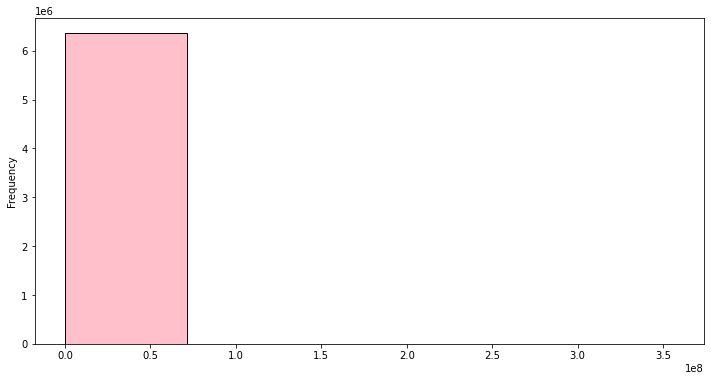

In [25]:
plt.xlabel('newbalanceDest')
df['newbalanceDest'].plot(kind='hist', bins=5, figsize=(12,6), facecolor='pink',edgecolor='black')
plt.show()

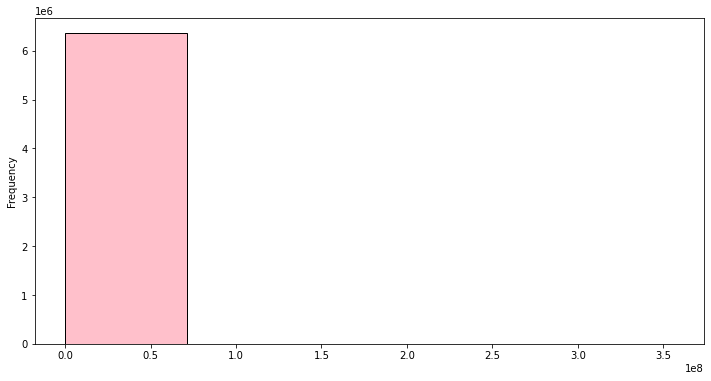

In [26]:
plt.xlabel('oldbalanceDest')
df['oldbalanceDest'].plot(kind='hist', bins=5, figsize=(12,6), facecolor='pink',edgecolor='black')
plt.show()

In [27]:
##OUTLIERS

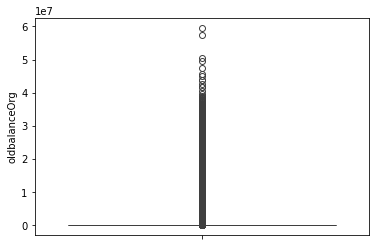

In [28]:
sb.boxplot(df.oldbalanceOrg)
plt.show()


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   step                     int64  
 1   type                     object 
 2   amount                   float64
 3   nameOrig                 object 
 4   oldbalanceOrg            float64
 5   newbalanceOrig           float64
 6   nameDest                 object 
 7   oldbalanceDest           float64
 8   newbalanceDest           float64
 9   isFraud                  int64  
 10  isFlaggedFraud           int64  
 11  balance_change_org       float64
 12  balance_change_dest      float64
 13  rel_balance_change_org   float64
 14  rel_balance_change_dest  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 728.1+ MB


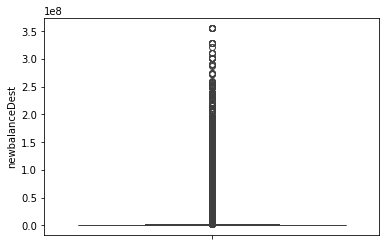

In [30]:

sb.boxplot(df['newbalanceDest'])
plt.show()

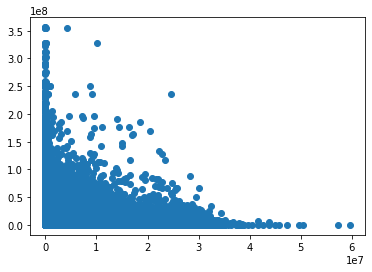

In [31]:
plt.scatter(df.oldbalanceOrg, df.newbalanceDest)
plt.show()

In [32]:

#Now we'll remove the outlier (skewness -measure of asymmetry)
#jitni 0 ke paas utni better hai#The interquartile range (IQR) is a measure of statistical dispersion, specifically a measure of variability in a dataset
Q1 = np.percentile(df['amount'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['amount'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [33]:
IQR

195331.935

In [34]:
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

In [35]:
upper = np.where(df['amount'] >= (Q3+1.5*IQR))
lower = np.where(df['amount'] <= (Q1-1.5*IQR))

In [36]:
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

In [37]:
df.step

0            1
1            1
2            1
3            1
4            1
          ... 
6362609    742
6362610    742
6362611    742
6362614    743
6362615    743
Name: step, Length: 6024543, dtype: int64

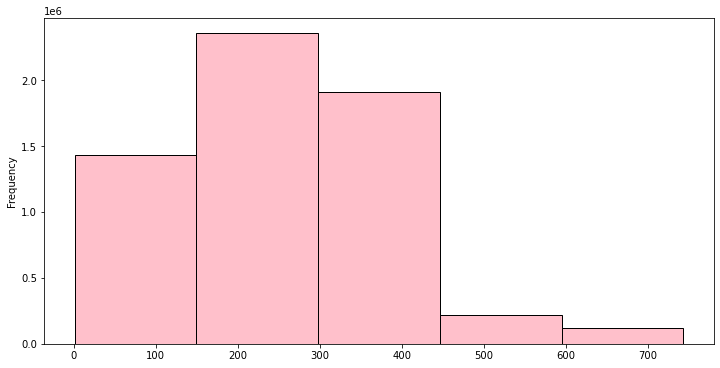

In [38]:
plt.xlabel('step')
df['step'].plot(kind='hist', bins=5, figsize=(12,6), facecolor='pink',edgecolor='black')
plt.show()

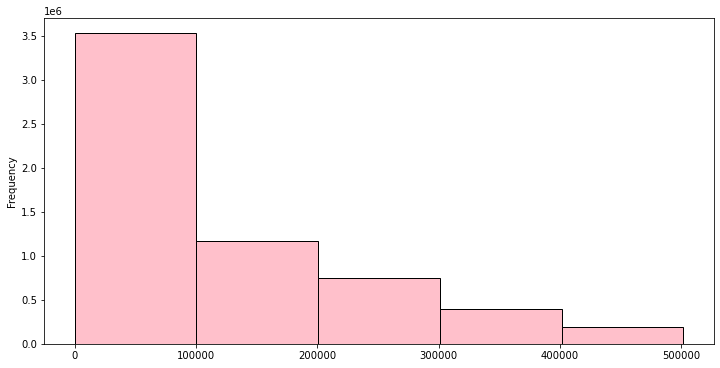

In [39]:
plt.xlabel('amount')
df['amount'].plot(kind='hist', bins=5, figsize=(12,6), facecolor='pink',edgecolor='black')
plt.show()

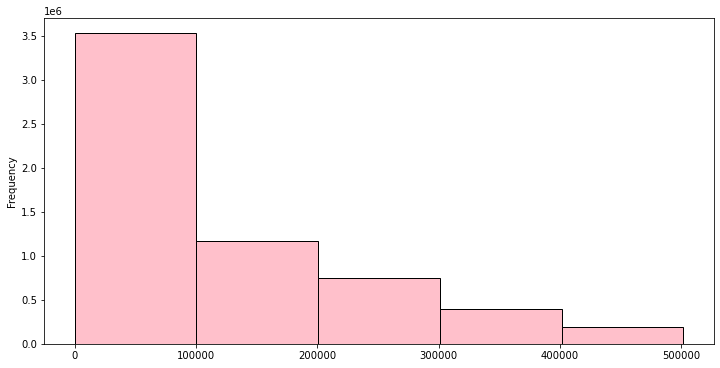

In [40]:
plt.xlabel('amount')
df['amount'].plot(kind='hist', bins=5, figsize=(12,6), facecolor='pink',edgecolor='black')
plt.show()

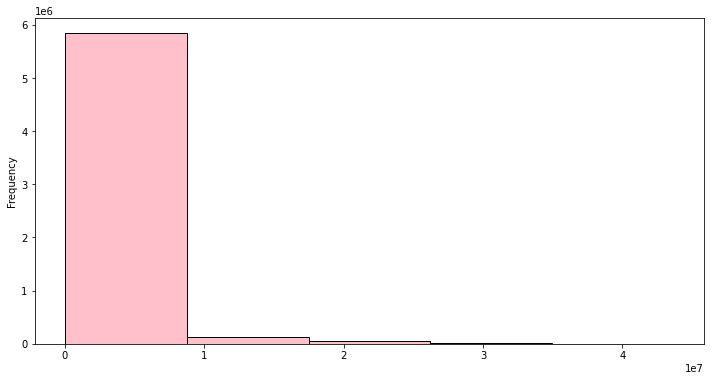

In [41]:
plt.xlabel('newbalanceOrig')
df['newbalanceOrig'].plot(kind='hist', bins=5, figsize=(12,6), facecolor='pink',edgecolor='black')
plt.show()

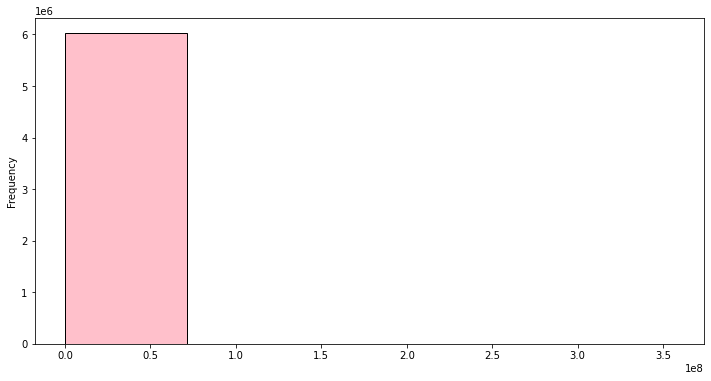

In [42]:
plt.xlabel('newbalanceDest')
df['newbalanceDest'].plot(kind='hist', bins=5, figsize=(12,6), facecolor='pink',edgecolor='black')
plt.show()

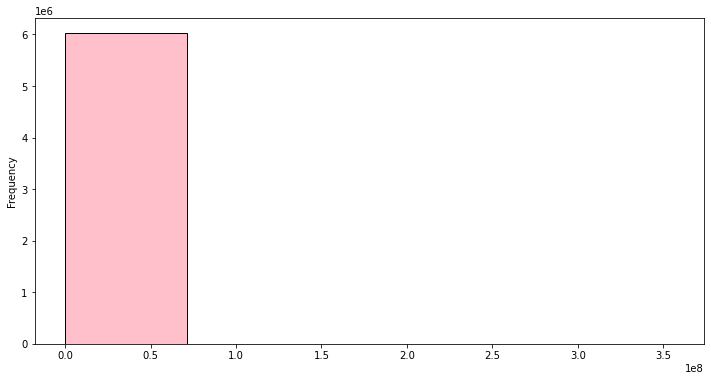

In [43]:
plt.xlabel('oldbalanceDest')
df['oldbalanceDest'].plot(kind='hist', bins=5, figsize=(12,6), facecolor='pink',edgecolor='black')
plt.show()

In [44]:
###TYPE
df.type


0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362609    CASH_OUT
6362610    TRANSFER
6362611    CASH_OUT
6362614    TRANSFER
6362615    CASH_OUT
Name: type, Length: 6024543, dtype: object

In [45]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [46]:
payment = df.type.value_counts()
payment

type
CASH_OUT    2185250
PAYMENT     2151495
CASH_IN     1373826
TRANSFER     272542
DEBIT         41430
Name: count, dtype: int64

<AxesSubplot:xlabel='type'>

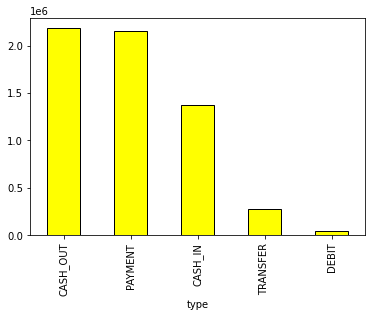

In [47]:
payment.plot(kind='bar',facecolor='yellow',edgecolor='black')

<AxesSubplot:xlabel='type', ylabel='count'>

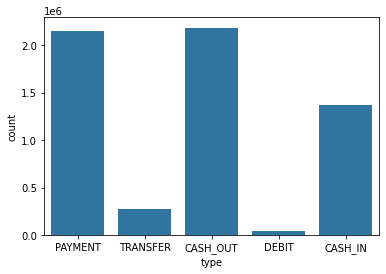

In [53]:
import seaborn as sns
sns.countplot(x='type', data=df)

In [54]:
CrosstabResult=pd.crosstab(index=df.type,columns=df.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1373826,0
CASH_OUT,2183053,2197
DEBIT,41430,0
PAYMENT,2151495,0
TRANSFER,270380,2162


In [55]:
#Calculating fraud percentage in cash_out and transfer

In [56]:
cashout=2183053+2197
cashout_fraud= 2197/(cashout) * 100
cashout_fraud
#0.10 % denotes the percentage of fraud happened in total cashout mode type, which is less%

0.1005376959157991

In [57]:
transfer= 270380+2162
transfer_fraud = 2162/(transfer) * 100
transfer_fraud

#0.79 % denotes the percentage of fraud happened in total tranfer mode type, which is  less%

0.7932722296013093

In [58]:
###amount

In [59]:
df.amount

0            9839.64
1            1864.28
2             181.00
3             181.00
4           11668.14
             ...    
6362609    258355.42
6362610     63416.99
6362611     63416.99
6362614    339682.13
6362615    339682.13
Name: amount, Length: 6024543, dtype: float64

<AxesSubplot:ylabel='amount'>

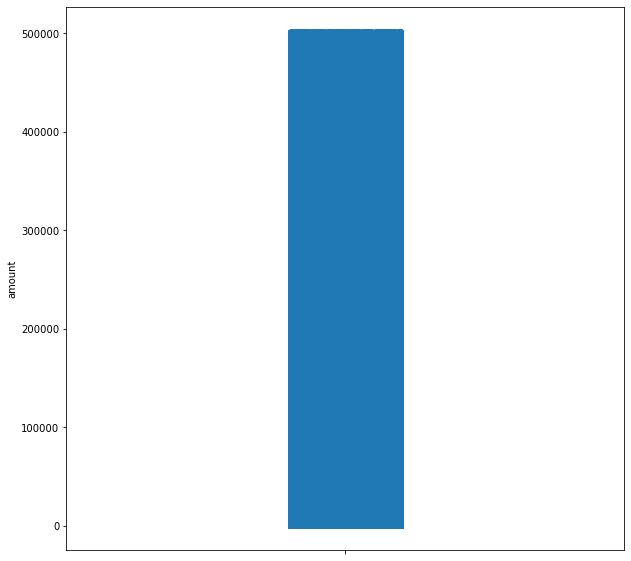

In [60]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.stripplot(y=df.amount)


In [61]:
print('Minimum: ',df.amount.min())
print('Maximum: ',df.amount.max())

Minimum:  0.0
Maximum:  501719.38


<AxesSubplot:title={'center':'amount'}, xlabel='isFraud'>

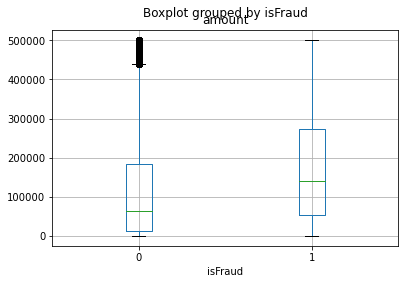

In [62]:
df.boxplot(column='amount', by='isFraud')

In [63]:
###isFlaggedFraud

In [64]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6024541
1          2
Name: count, dtype: int64

In [65]:
flagged_fraud_records = df[(df.isFraud==1) & (df.isFlaggedFraud==1)]
flagged_fraud_records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest,rel_balance_change_org,rel_balance_change_dest
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1,0.0,0.0,0.0,NaN
6281484,646,TRANSFER,399045.08,C724693370,10399045.08,10399045.08,C1909486199,0.0,0.0,1,1,0.0,0.0,0.0,NaN


In [66]:
flagged_fraud_records.shape

(2, 15)

In [67]:
total_fraud= df[df.isFraud ==1]
total_fraud = total_fraud.shape[0]
total_fraud


4359

In [68]:
total_isflaggedFraud= flagged_fraud_records.shape[0]
total_isflaggedFraud

2

In [69]:
flagged_percent = total_isflaggedFraud/total_fraud * 100
print('Percentage of flagged fraud: ',round(flagged_percent,3))

unflagged_percent= (total_fraud-total_isflaggedFraud)/total_fraud * 100
print('Percentage of incorrectly flagged fraud: ',round(unflagged_percent,3))

Percentage of flagged fraud:  0.046
Percentage of incorrectly flagged fraud:  99.954


In [70]:
##isFraud

In [71]:
total_transactions = df.shape[0]

fraud_transaction = df[df.isFraud==1].shape[0]

fraud_percent= fraud_transaction/total_transactions * 100
fraud_percent

0.07235403581649263

In [72]:
print('Total transactions: ',total_transactions)
print('Total fraud transactions happened: ',fraud_transaction)
print("Total fraud transaction percent: ",round(fraud_percent,2))

Total transactions:  6024543
Total fraud transactions happened:  4359
Total fraud transaction percent:  0.07


In [73]:
fraud_amount= df[df.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest,rel_balance_change_org,rel_balance_change_dest
1059647,111,CASH_OUT,501496.31,C279192006,501496.31,0.0,C2046472223,0.00,501496.31,1,0,-501496.31,501496.31,-1.0,inf
1059646,111,TRANSFER,501496.31,C1595104027,501496.31,0.0,C643646528,0.00,0.00,1,0,-501496.31,0.00,-1.0,NaN
6362385,724,CASH_OUT,501425.84,C1112202399,501425.84,0.0,C1546219364,0.00,501425.84,1,0,-501425.84,501425.84,-1.0,inf
6362384,724,TRANSFER,501425.84,C241686740,501425.84,0.0,C2071832199,0.00,0.00,1,0,-501425.84,0.00,-1.0,NaN
6117046,528,TRANSFER,501101.41,C1409061891,501101.41,0.0,C1663472922,0.00,0.00,1,0,-501101.41,0.00,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563714,387,CASH_OUT,0.00,C1294472700,0.00,0.0,C1325541393,7970766.57,7970766.57,1,0,0.00,0.00,NaN,0.0
6362585,741,CASH_OUT,0.00,C312737633,0.00,0.0,C1400061387,267522.87,267522.87,1,0,0.00,0.00,NaN,0.0
6281483,646,CASH_OUT,0.00,C2060908932,0.00,0.0,C1587892888,0.00,0.00,1,0,0.00,0.00,NaN,NaN
6281485,646,CASH_OUT,0.00,C1997645312,0.00,0.0,C601248796,0.00,0.00,1,0,0.00,0.00,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

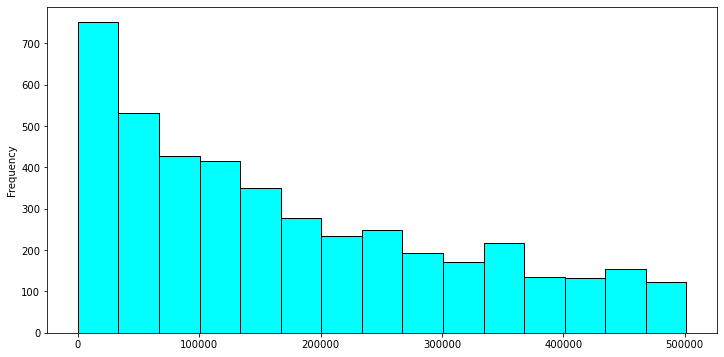

In [74]:
fraud_amount.amount.plot(kind='hist', bins=15, figsize=(12,6), facecolor='cyan',edgecolor='black')

In [75]:
###nameDest

In [76]:
rec= df.nameDest.value_counts()
rec

nameDest
C1286084959    91
C985934102     87
C977993101     86
C2083562754    86
C1360767589    82
               ..
M1746061614     1
M1323326905     1
M793602765      1
M1304314299     1
C1850423904     1
Name: count, Length: 2716238, dtype: int64

In [77]:
rec[:10]

nameDest
C1286084959    91
C985934102     87
C977993101     86
C2083562754    86
C1360767589    82
C1590550415    82
C392292416     81
C248609774     81
C1789550256    81
C451111351     80
Name: count, dtype: int64

<AxesSubplot:ylabel='nameDest'>

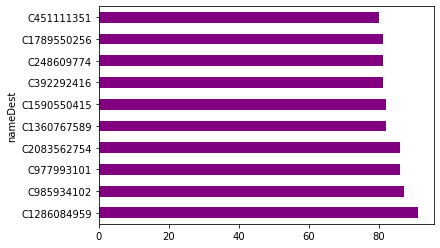

In [78]:
rec[:10].plot(kind='barh',facecolor='purple')

In [96]:
###Step

C:\Users\kharl\AppData\Local\Temp\ipykernel_23324\395256865.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['step'], bins=50)


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

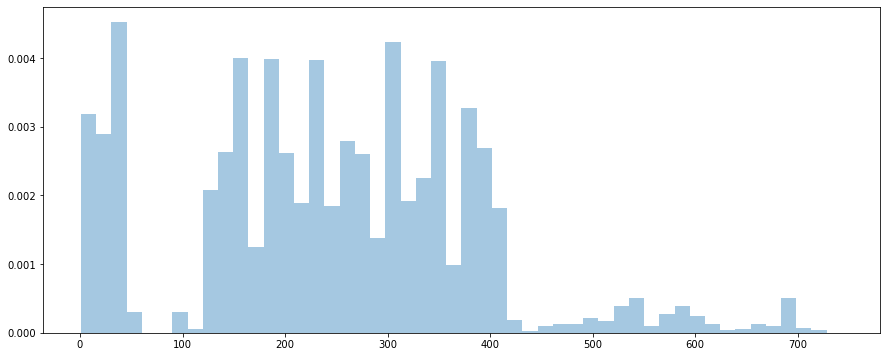

In [74]:
plt.figure(figsize=(15, 6))
sns.distplot(df['step'], bins=50)

In [79]:
### Correlation between features

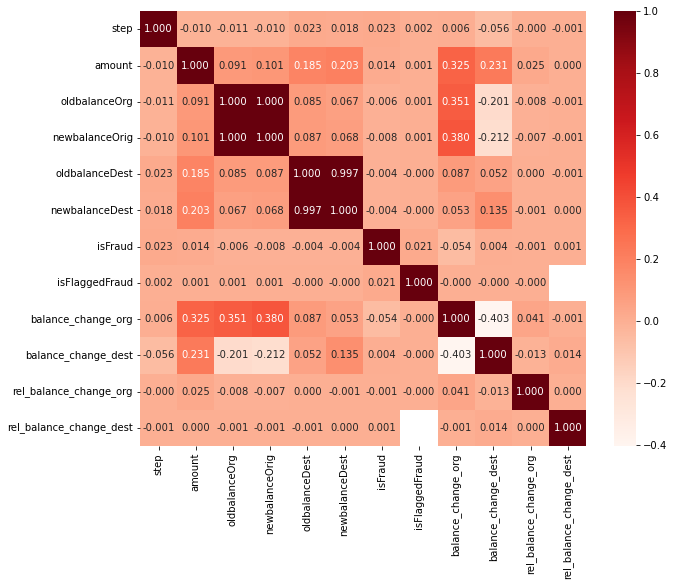

In [80]:
# Assuming df is your DataFrame and you want to exclude non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns

# Compute correlation matrix on numeric data
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Reds', fmt=".3f")
plt.show()


In [81]:
df.isna().sum()

step                             0
type                             0
amount                           0
nameOrig                         0
oldbalanceOrg                    0
newbalanceOrig                   0
nameDest                         0
oldbalanceDest                   0
newbalanceDest                   0
isFraud                          0
isFlaggedFraud                   0
balance_change_org               0
balance_change_dest              0
rel_balance_change_org     1935149
rel_balance_change_dest    2312006
dtype: int64

In [82]:
df.nlargest(10, 'amount')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest,rel_balance_change_org,rel_balance_change_dest
1675737,159,CASH_OUT,501719.38,C1970677139,18653.00,0.00,C1619270798,235419.03,737138.41,0,0,-18653.00,501719.38,-1.000000,2.131176
1737199,161,CASH_OUT,501718.41,C1077569708,78605.00,0.00,C1924590813,697311.14,1199029.56,0,0,-78605.00,501718.42,-1.000000,0.719504
1082806,129,CASH_IN,501718.02,C970634468,20873140.30,21374858.32,C1091756447,5463193.08,5127569.29,0,0,501718.02,-335623.79,0.024037,-0.061434
2827303,226,CASH_OUT,501717.55,C855812747,121947.70,0.00,C914557298,1379104.08,1880821.63,0,0,-121947.70,501717.55,-1.000000,0.363800
2069077,181,CASH_IN,501717.33,C897630635,5120317.65,5622034.98,C1830915224,1314756.05,813038.72,0,0,501717.33,-501717.33,0.097986,-0.381605
5280111,372,CASH_OUT,501715.41,C555809067,96128.79,0.00,C1185830080,664493.22,1166208.64,0,0,-96128.79,501715.42,-1.000000,0.755035
2984534,231,CASH_IN,501715.19,C1586580516,4122.00,505837.19,C1796738748,0.00,0.00,0,0,501715.19,0.00,121.716446,NaN
1638216,157,CASH_IN,501710.64,C843040970,430.00,502140.64,C1864097021,0.00,0.00,0,0,501710.64,0.00,1166.768930,NaN
2025441,180,CASH_IN,501710.41,C1109167155,14682491.62,15184202.03,C145739790,6008879.39,5507168.98,0,0,501710.41,-501710.41,0.034171,-0.083495
823098,41,TRANSFER,501709.63,C585977042,9846.00,0.00,C876306094,5932706.69,6434416.32,0,0,-9846.00,501709.63,-1.000000,0.084567


In [83]:
x = df.nlargest(10, 'amount').type
  
def unique(li):
    value_counts = []
    for i in li:
        c = li.count(i)
        value_counts.append((i,c))
    return value_counts

In [84]:
x

1675737    CASH_OUT
1737199    CASH_OUT
1082806     CASH_IN
2827303    CASH_OUT
2069077     CASH_IN
5280111    CASH_OUT
2984534     CASH_IN
1638216     CASH_IN
2025441     CASH_IN
823098     TRANSFER
Name: type, dtype: object

In [85]:
from collections import Counter
Counter(x)

Counter({'CASH_OUT': 4, 'CASH_IN': 5, 'TRANSFER': 1})

In [86]:
df.nlargest(10, 'amount').isFraud
#higher the amount more secure
#the largest 10 amount of money are in usual in cash in and cash out transactions and mostly safed

1675737    0
1737199    0
1082806    0
2827303    0
2069077    0
5280111    0
2984534    0
1638216    0
2025441    0
823098     0
Name: isFraud, dtype: int64

In [87]:
Counter(df.nlargest(100, 'amount').type)
#in the largest 100 amount the cash out become the largest and transfer more than cash in

Counter({'CASH_OUT': 45, 'CASH_IN': 22, 'TRANSFER': 33})

In [88]:
x = df.nlargest(100, 'amount').isFraud
counter = 0
if 1 in x.values:
    counter +=1
counter
#in the largest 100 amounts there was no fraud

0

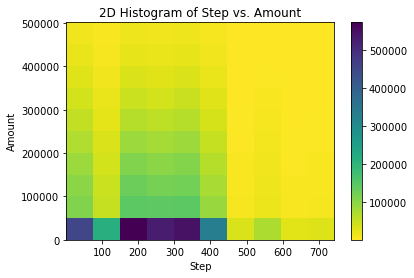

In [89]:

import matplotlib.pyplot as plt

# Check lengths of 'step' and 'amount' columns
if len(df['step']) != len(df['amount']):
    raise ValueError("Lengths of 'step' and 'amount' columns are not the same.")

# Plot 2D histogram if lengths are the same
plt.hist2d(data=df, x='step', y='amount', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Step')
plt.ylabel('Amount')
plt.title('2D Histogram of Step vs. Amount')
plt.show()

#the largest amount between 200 aqnd 300 steps
#the greater than or equal 500000 $ amount in the steps between 200 and 250 also we n oticed that the data is right skewed which mean > median but in small difference and it tend to be normal distribution let's see the confidence interval


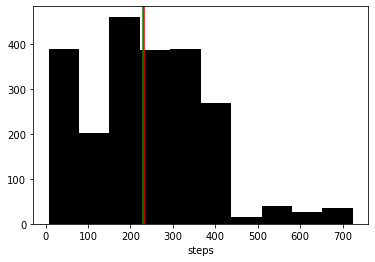

In [90]:
step_amount_avg = df[df.amount >= 500000]['step']
plt.hist(step_amount_avg, color = 'black')
plt.axvline(step_amount_avg.mean(), color = 'red')
plt.axvline(step_amount_avg.median(), color = 'green')
plt.xlabel('steps')
plt.show()
#It provides a measure of the uncertainty or variability associated with estimating a population parameter from sample data.

In [91]:
import scipy.stats as st
st.t.interval(alpha=0.90, df=len(step_amount_avg)-1,
              loc=np.mean(step_amount_avg),
              scale=st.sem(step_amount_avg))

(227.86889758368235, 237.97885955270186)

In [92]:
print(f'the number of unique values of nameOrig is : {round((len(df.nameOrig.unique()) * 100) / df.shape[0], 2)} %')

the number of unique values of nameOrig is : 99.86 %


In [245]:
df[df.nameOrig == 'C1065307291']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest,rel_balance_change_org,rel_balance_change_dest
361126,17,PAYMENT,5530.99,C1065307291,819637.87,814106.88,M1175397032,0.0,0.0,0,0,-5530.99,0.0,-0.006748,NaN
1799163,162,CASH_IN,88230.47,C1065307291,38128.00,126358.47,C1154752493,0.0,0.0,0,0,88230.47,0.0,2.314060,NaN
4829222,347,PAYMENT,19717.82,C1065307291,0.00,0.00,M2131079968,0.0,0.0,0,0,0.00,0.0,NaN,NaN


In [93]:
Messi = df.nameOrig.mode()


In [94]:
original_name = []
for i in Messi.values:
    original_name.append((i,df[df.nameOrig == i].shape[0]))
for j in original_name:
    print(j)

('C1065307291', 3)
('C1462946854', 3)
('C1530544995', 3)
('C1677795071', 3)
('C1784010646', 3)
('C1832548028', 3)
('C1902386530', 3)
('C1976208114', 3)
('C1999539787', 3)
('C2051359467', 3)
('C2098525306', 3)
('C363736674', 3)
('C400299098', 3)
('C724452879', 3)


In [95]:
df.nameOrig = df.nameOrig.str.replace('C','').astype('int')
df.rename(columns = {'nameOrig': 'client_id'}, inplace = True)

In [96]:
df.client_id

0          1231006815
1          1666544295
2          1305486145
3           840083671
4          2048537720
              ...    
6362609    1113162093
6362610     778071008
6362611     994950684
6362614    2013999242
6362615     786484425
Name: client_id, Length: 6024543, dtype: int32

In [97]:
#balance before transactions
df.oldbalanceOrg

0          170136.00
1           21249.00
2             181.00
3             181.00
4           41554.00
             ...    
6362609    258355.42
6362610     63416.99
6362611     63416.99
6362614    339682.13
6362615    339682.13
Name: oldbalanceOrg, Length: 6024543, dtype: float64

In [98]:
df.oldbalanceOrg.describe()


count    6.024543e+06
mean     8.619578e+05
std      2.933836e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.514600e+04
75%      1.134380e+05
max      4.381886e+07
Name: oldbalanceOrg, dtype: float64

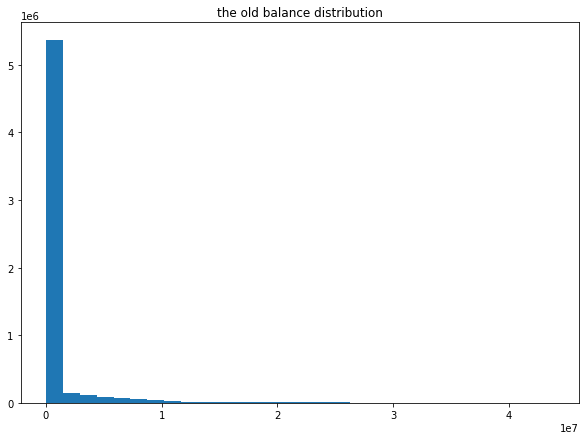

In [99]:
plt.figure(figsize = [10,7])
plt.hist(df.oldbalanceOrg, bins = 30)
plt.title('the old balance distribution')
plt.show()

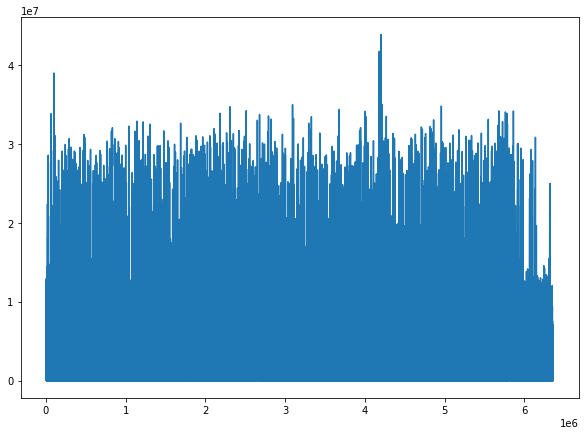

In [100]:
plt.figure(figsize = [10,7])
plt.plot(df.oldbalanceOrg)
plt.show()

In [101]:
df.nlargest(20, 'oldbalanceOrg')

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest,rel_balance_change_org,rel_balance_change_dest
4203639,305,CASH_OUT,132238.97,559275248,43818855.30,43686616.33,C1114436169,5327024.57,5459263.54,0,0,-132238.97,132238.97,-0.003018,0.024824
4203640,305,PAYMENT,12814.12,2080486364,43686616.33,43673802.21,M928977012,0.00,0.00,0,0,-12814.12,0.00,-0.000293,NaN
4180200,304,PAYMENT,8301.85,1568160039,41699144.49,41690842.64,M1906748245,0.00,0.00,0,0,-8301.85,0.00,-0.000199,NaN
4180201,304,CASH_OUT,258483.17,438977024,41690842.64,41432359.46,C1162702437,6449276.06,6707759.23,0,0,-258483.18,258483.17,-0.006200,0.040079
100307,10,CASH_IN,6808.99,1841909664,38939424.03,38946233.02,C734236179,97006.33,90197.34,0,0,6808.99,-6808.99,0.000175,-0.070191
100306,10,CASH_IN,376022.62,1450387949,38563401.41,38939424.03,C1050374066,1812980.49,1720832.30,0,0,376022.62,-92148.19,0.009751,-0.050827
100305,10,CASH_IN,121569.82,1576842193,38441831.60,38563401.41,C1283626649,304887.13,263945.32,0,0,121569.81,-40941.81,0.003162,-0.134285
100304,10,CASH_IN,77083.57,1040382471,38364748.02,38441831.60,C1940815076,180735.97,103652.40,0,0,77083.58,-77083.57,0.002009,-0.426498
100303,10,CASH_IN,105150.78,1273896430,38259597.25,38364748.02,C1142840636,545669.97,25148.24,0,0,105150.77,-520521.73,0.002748,-0.953913
100302,10,CASH_IN,92897.18,1319675286,38166700.07,38259597.25,C734480558,98196.34,5299.16,0,0,92897.18,-92897.18,0.002434,-0.946035


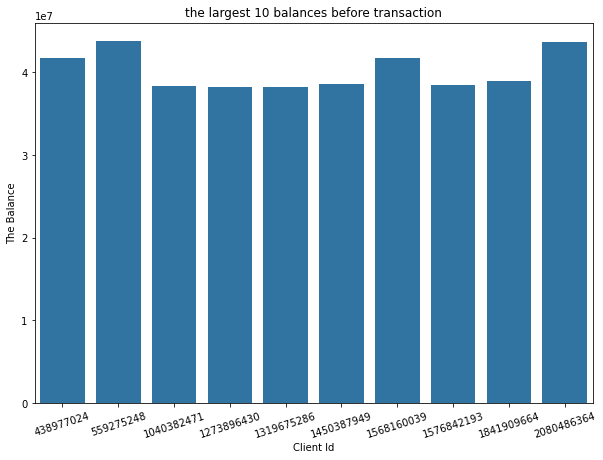

In [102]:
plt.figure(figsize = [10,7])
sb.barplot(x = df.nlargest(10, 'oldbalanceOrg').client_id, y = df.nlargest(10, 'oldbalanceOrg').oldbalanceOrg)
plt.xticks(rotation = 17.5)
plt.title('the largest 10 balances before transaction')
plt.xlabel('Client Id')
plt.ylabel('The Balance')
plt.show()


In [103]:
#balance after transaction
df.newbalanceOrig

0          160296.36
1           19384.72
2               0.00
3               0.00
4           29885.86
             ...    
6362609         0.00
6362610         0.00
6362611         0.00
6362614         0.00
6362615         0.00
Name: newbalanceOrig, Length: 6024543, dtype: float64

In [104]:
df.newbalanceOrig.describe()

count    6.024543e+06
mean     8.859128e+05
std      2.969976e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.602874e+05
max      4.368662e+07
Name: newbalanceOrig, dtype: float64

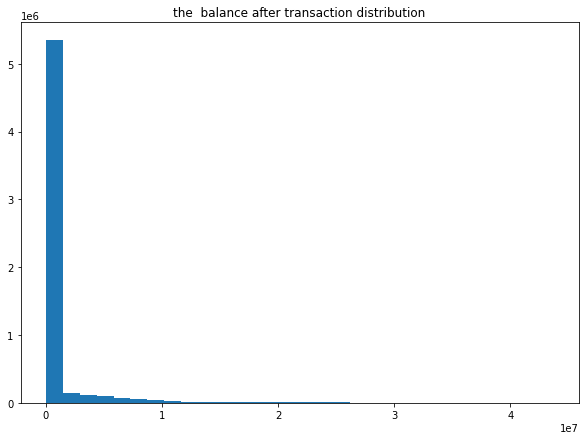

In [105]:
plt.figure(figsize = [10,7])
plt.hist(df.newbalanceOrig, bins = 30)
plt.title('the  balance after transaction distribution')
plt.show()

In [106]:
df.nlargest(20, 'newbalanceOrig')

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest,rel_balance_change_org,rel_balance_change_dest
4203639,305,CASH_OUT,132238.97,559275248,43818855.30,43686616.33,C1114436169,5327024.57,5459263.54,0,0,-132238.97,132238.97,-0.003018,0.024824
4203640,305,PAYMENT,12814.12,2080486364,43686616.33,43673802.21,M928977012,0.00,0.00,0,0,-12814.12,0.00,-0.000293,NaN
4180200,304,PAYMENT,8301.85,1568160039,41699144.49,41690842.64,M1906748245,0.00,0.00,0,0,-8301.85,0.00,-0.000199,NaN
4180201,304,CASH_OUT,258483.17,438977024,41690842.64,41432359.46,C1162702437,6449276.06,6707759.23,0,0,-258483.18,258483.17,-0.006200,0.040079
100307,10,CASH_IN,6808.99,1841909664,38939424.03,38946233.02,C734236179,97006.33,90197.34,0,0,6808.99,-6808.99,0.000175,-0.070191
100306,10,CASH_IN,376022.62,1450387949,38563401.41,38939424.03,C1050374066,1812980.49,1720832.30,0,0,376022.62,-92148.19,0.009751,-0.050827
100305,10,CASH_IN,121569.82,1576842193,38441831.60,38563401.41,C1283626649,304887.13,263945.32,0,0,121569.81,-40941.81,0.003162,-0.134285
100304,10,CASH_IN,77083.57,1040382471,38364748.02,38441831.60,C1940815076,180735.97,103652.40,0,0,77083.58,-77083.57,0.002009,-0.426498
100303,10,CASH_IN,105150.78,1273896430,38259597.25,38364748.02,C1142840636,545669.97,25148.24,0,0,105150.77,-520521.73,0.002748,-0.953913
100302,10,CASH_IN,92897.18,1319675286,38166700.07,38259597.25,C734480558,98196.34,5299.16,0,0,92897.18,-92897.18,0.002434,-0.946035


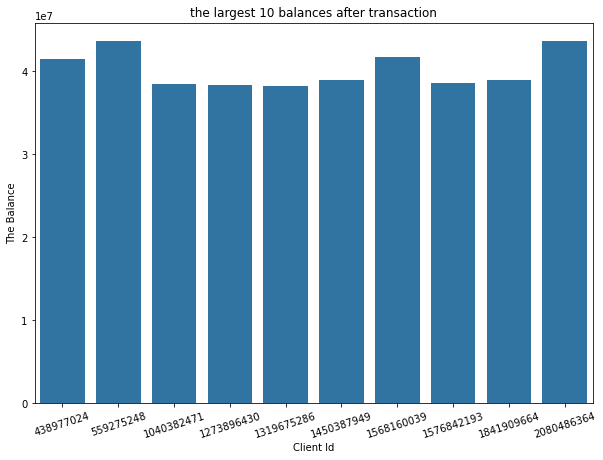

In [107]:
plt.figure(figsize = [10,7])
sb.barplot(x = df.nlargest(10, 'newbalanceOrig').client_id, y = df.nlargest(10, 'newbalanceOrig').newbalanceOrig)
plt.xticks(rotation = 17.5)
plt.title('the largest 10 balances after transaction')
plt.xlabel('Client Id')
plt.ylabel('The Balance')
plt.show()


In [108]:
#for the largest 10 clients we don't see any change in the balance between the before and after transaction so now I will going to see the difference between the two ranges
num_of_samples = 10 / df.shape[0]

In [109]:
df.shape[0]

6024543

In [110]:
samp1 = df.sample(n = 600000)

In [111]:
samp1

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest,rel_balance_change_org,rel_balance_change_dest
312229,16,PAYMENT,2589.17,1376469773,0.00,0.00,M1609654804,0.00,0.00,0,0,0.00,0.00,NaN,NaN
1727811,160,CASH_IN,329966.52,2091971880,6675523.29,7005489.81,C1673666267,10483723.97,10153757.45,0,0,329966.52,-329966.52,0.049429,-0.031474
229873,14,PAYMENT,19747.40,592749260,0.00,0.00,M1982012416,0.00,0.00,0,0,0.00,0.00,NaN,NaN
4959925,351,PAYMENT,10677.51,1891271717,630646.00,619968.49,M468217843,0.00,0.00,0,0,-10677.51,0.00,-0.016931,NaN
1504820,143,PAYMENT,2080.83,466518595,312180.00,310099.17,M34284926,0.00,0.00,0,0,-2080.83,0.00,-0.006665,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593568,207,CASH_OUT,66088.45,936988749,0.00,0.00,C66330156,1403685.82,1469774.27,0,0,0.00,66088.45,NaN,0.047082
961082,44,PAYMENT,5843.70,1007338385,20148.00,14304.30,M334753885,0.00,0.00,0,0,-5843.70,0.00,-0.290039,NaN
2715167,211,PAYMENT,11614.51,272923742,117.00,0.00,M270998017,0.00,0.00,0,0,-117.00,0.00,-1.000000,NaN
334623,16,CASH_OUT,159666.58,170397135,0.00,0.00,C861057755,609298.65,768965.23,0,0,0.00,159666.58,NaN,0.262050


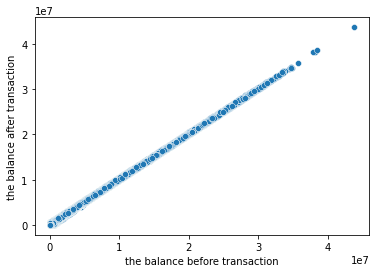

In [112]:
sb.scatterplot(x = samp1.oldbalanceOrg, y = samp1.newbalanceOrig)
plt.xlabel('the balance before transaction')
plt.ylabel('the balance after transaction')
plt.show()

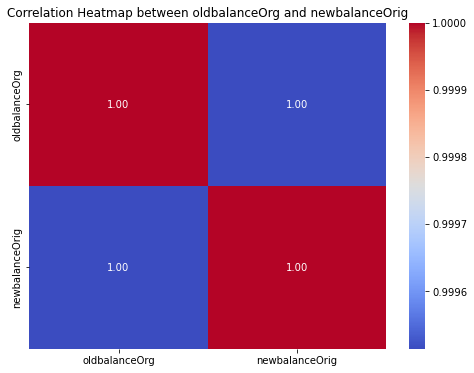

In [113]:

corr_matrix = df[['oldbalanceOrg', 'newbalanceOrig']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between oldbalanceOrg and newbalanceOrig')
plt.show()
#the sampling distribution shows an strong positive correlation between the balance between the balance before transaction and balance after transaction and that's mean The higher the account balance => the higher the transfer balance

In [114]:
df['balance_diff'] = df.oldbalanceOrg - df.newbalanceOrig
#let's see the difference between the old and new balances in order to show the rate of change between them

In [115]:
df.balance_diff.describe()

count    6.024543e+06
mean    -2.395505e+04
std      9.888992e+04
min     -5.017180e+05
25%      0.000000e+00
50%      0.000000e+00
75%      9.776675e+03
max      5.016732e+05
Name: balance_diff, dtype: float64

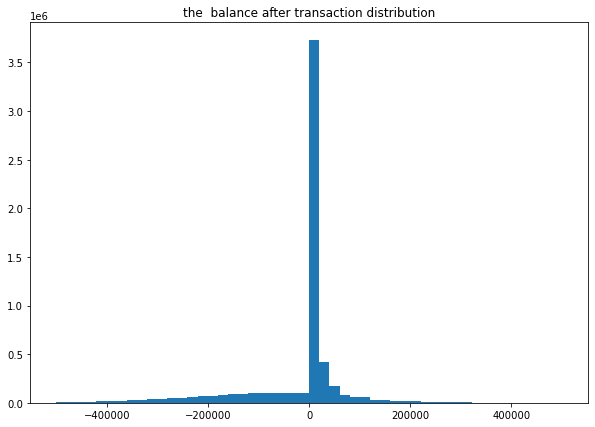

In [116]:
plt.figure(figsize = [10,7])
plt.hist(df.balance_diff, bins=50)
plt.title('the  balance after transaction distribution')
plt.show()

In [117]:
#let's see the nameDest which is the id of the distination client
df.head()

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest,rel_balance_change_org,rel_balance_change_dest,balance_diff
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0,-0.057834,NaN,9839.64
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0,-0.087735,NaN,1864.28
2,1,TRANSFER,181.00,1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00,0.0,-1.000000,NaN,181.00
3,1,CASH_OUT,181.00,840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00,-21182.0,-1.000000,-1.0,181.00
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0,-0.280795,NaN,11668.14


In [118]:
df.nameDest.describe()

count         6024543
unique        2716238
top       C1286084959
freq               91
Name: nameDest, dtype: object

In [119]:
df.nameDest.mode()

0    C1286084959
Name: nameDest, dtype: object

In [120]:
#top 10 dest id
n = 10
df['nameDest'].value_counts()[:n]

nameDest
C1286084959    91
C985934102     87
C977993101     86
C2083562754    86
C1360767589    82
C1590550415    82
C392292416     81
C248609774     81
C1789550256    81
C451111351     80
Name: count, dtype: int64

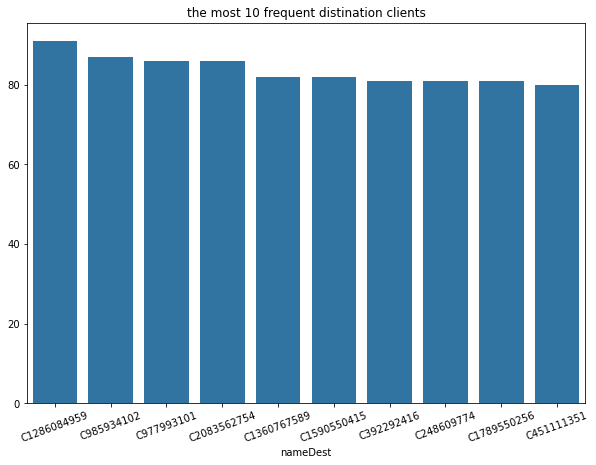

In [121]:
plt.figure(figsize = [10, 7])
sb.barplot(x = df['nameDest'].value_counts()[:n].index, y = df['nameDest'].value_counts()[:n].values)
plt.xticks(rotation = 20)
plt.title('the most 10 frequent distination clients')
plt.show()
#and here we can say there's an fraud detection because some distination clients like the first one which has 92 transaction some thing may be wrong here and so on


In [122]:
df[df.nameDest == 'C1286084959']

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest,rel_balance_change_org,rel_balance_change_dest,balance_diff
367,1,TRANSFER,176334.26,169880779,45136.00,0.00,C1286084959,1251626.46,2107778.11,0,0,-45136.00,856151.65,-1.000000,0.684031,45136.00
388,1,CASH_OUT,373068.26,1047934137,20034.00,0.00,C1286084959,1427960.73,2107778.11,0,0,-20034.00,679817.38,-1.000000,0.476076,20034.00
471,1,CASH_IN,403418.39,848097505,3834666.95,4238085.34,C1286084959,1801028.99,2107778.11,0,0,403418.39,306749.12,0.105203,0.170319,-403418.39
642,1,CASH_IN,222126.95,870322840,6688712.64,6910839.59,C1286084959,1397610.60,2107778.11,0,0,222126.95,710167.51,0.033209,0.508130,-222126.95
659,1,CASH_IN,317393.38,1197721383,8906617.38,9224010.75,C1286084959,1175483.65,2107778.11,0,0,317393.37,932294.46,0.035636,0.793116,-317393.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4810092,346,CASH_OUT,84205.39,86576996,0.00,0.00,C1286084959,61680519.75,61764725.14,0,0,0.00,84205.39,NaN,0.001365,0.00
4832993,347,CASH_OUT,235564.75,1068656420,0.00,0.00,C1286084959,61764725.14,62000289.89,0,0,0.00,235564.75,NaN,0.003814,0.00
5566959,393,CASH_IN,119568.31,1878371174,8348248.96,8467817.28,C1286084959,62000289.89,61880721.58,0,0,119568.32,-119568.31,0.014323,-0.001929,-119568.32
5596560,394,CASH_OUT,381887.53,1789981744,50447.00,0.00,C1286084959,61880721.58,62262609.11,0,0,-50447.00,381887.53,-1.000000,0.006171,50447.00


In [123]:
totti = df[df.nameDest == 'C1286084959']
totti.describe()

,step,amount,client_id,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest,rel_balance_change_org,rel_balance_change_dest,balance_diff
count,91.000000,91.000000,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,91.0,91.0,91.000000,9.100000e+01,57.000000,91.000000,91.000000
mean,50.714286,206309.763297,1.002663e+09,1.892348e+06,1.953412e+06,1.362347e+07,1.437131e+07,0.0,0.0,61064.217582,7.478390e+05,9.572934,0.170612,-61064.217582
std,103.593145,132179.220078,6.406173e+08,2.819321e+06,2.907859e+06,1.564074e+07,1.545007e+07,0.0,0.0,140952.576098,1.296052e+06,65.770061,0.374665,140952.576098
min,1.000000,2373.110000,1.311740e+07,0.000000e+00,0.000000e+00,8.580903e+05,1.378570e+06,0.0,0.0,-274115.550000,-7.850882e+05,-1.000000,-0.283426,-425052.420000
25%,2.500000,98940.590000,5.029396e+08,0.000000e+00,0.000000e+00,2.584442e+06,2.107778e+06,0.0,0.0,0.000000,-1.932565e+04,-1.000000,-0.000304,-132708.380000
50%,8.000000,189251.840000,9.600608e+08,5.819826e+04,0.000000e+00,1.162832e+07,1.295976e+07,0.0,0.0,0.000000,2.661832e+05,0.017230,0.018984,0.000000
75%,17.500000,288275.840000,1.641864e+09,3.664394e+06,3.997775e+06,1.874441e+07,1.889081e+07,0.0,0.0,132708.380000,1.192300e+06,0.049719,0.182261,0.000000
max,401.000000,483544.300000,2.112648e+09,1.092285e+07,1.104356e+07,6.226261e+07,6.245186e+07,0.0,0.0,425052.420000,4.659009e+06,492.687567,1.456359,274115.550000


In [124]:
6.245186e+07

62451860.0

In [125]:
totti[totti.newbalanceDest == totti.newbalanceDest.max()]

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest,rel_balance_change_org,rel_balance_change_dest,balance_diff
5792331,401,CASH_OUT,189251.84,1256632176,22224.0,0.0,C1286084959,62262609.11,62451860.94,0,0,-22224.0,189251.83,-1.0,0.00304,22224.0


In [126]:
totti[(totti.isFraud == 1) | (totti.isFlaggedFraud == 1)]
#this client doesnot have any fraud

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest,rel_balance_change_org,rel_balance_change_dest,balance_diff


In [127]:
df[df.isFraud == 1]
#most frequent distination client with fraud transaction cases

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest,rel_balance_change_org,rel_balance_change_dest,balance_diff
2,1,TRANSFER,181.00,1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,-181.00,0.00,-1.0,NaN,181.00
3,1,CASH_OUT,181.00,840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,-181.00,-21182.00,-1.0,-1.000000,181.00
251,1,TRANSFER,2806.00,1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0,-2806.00,0.00,-1.0,NaN,2806.00
252,1,CASH_OUT,2806.00,2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,-2806.00,-26202.00,-1.0,-1.000000,2806.00
680,1,TRANSFER,20128.00,137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0,-20128.00,0.00,-1.0,NaN,20128.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362609,742,CASH_OUT,258355.42,1113162093,258355.42,0.0,C797688696,25176.67,283532.09,1,0,-258355.42,258355.42,-1.0,10.261699,258355.42
6362610,742,TRANSFER,63416.99,778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0,-63416.99,0.00,-1.0,NaN,63416.99
6362611,742,CASH_OUT,63416.99,994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0,-63416.99,63416.99,-1.0,0.229412,63416.99
6362614,743,TRANSFER,339682.13,2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0,-339682.13,0.00,-1.0,NaN,339682.13


In [128]:
df[df.isFlaggedFraud == 1]

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest,rel_balance_change_org,rel_balance_change_dest,balance_diff
6205439,586,TRANSFER,353874.22,1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1,0.0,0.0,0.0,NaN,0.0
6281484,646,TRANSFER,399045.08,724693370,10399045.08,10399045.08,C1909486199,0.0,0.0,1,1,0.0,0.0,0.0,NaN,0.0


In [129]:
# get top 10 most frequent fraud distination clients
x = df[df.isFraud == 1]
n = 10
Ramos = x['nameDest'].value_counts()[:n]
Ramos

nameDest
C1325541393    2
C505532836     2
C410033330     2
C935310781     2
C200064275     2
C475338087     2
C1148781766    2
C1656842502    2
C1460854172    2
C686334805     2
Name: count, dtype: int64

In [130]:
for i in Ramos.index:
    if i in df['nameDest'].value_counts()[:n].index:
        print(i)
        #we notice that the most frequent distination clients not motch to the most frequent fraud transaction process

In [131]:
df.nameDest = df.nameDest.replace('C','')
df.nameDest = df.nameDest.replace('M','')
df.rename(columns = {'nameDest' : 'distination_client_id'}, inplace = True)


In [132]:
#data preprocessing

In [133]:
df.isFraud.value_counts()


isFraud
0    6020184
1       4359
Name: count, dtype: int64

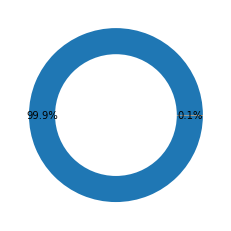

In [134]:
plt.pie(df.isFraud.value_counts(),
        autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


In [135]:
#balancing the data  set cpz fraud data is very small 0.1%
# class count
class_count_0, class_count_1 = df['isFraud'].value_counts()

# Separate class
class_0 = df[df['isFraud'] == 0]
class_1 = df[df['isFraud'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (6020184, 16)
class 1: (4359, 16)


total class of 1 and0: isFraud
0    4359
1    4359
Name: count, dtype: int64


<AxesSubplot:title={'center':'count (target)'}, xlabel='isFraud'>

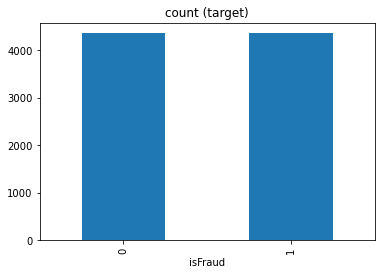

In [136]:
class_0_under = class_0.sample(class_count_1)

balancing_data = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",balancing_data['isFraud'].value_counts())# plot the count after under-sampeling
balancing_data['isFraud'].value_counts().plot(kind='bar', title='count (target)')

In [137]:
balancing_data

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,distination_client_id,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest,rel_balance_change_org,rel_balance_change_dest,balance_diff
4142340,303,PAYMENT,24021.72,2145671699,15178.00,0.00,M1467323787,0.00,0.00,0,0,-15178.00,0.00,-1.000000,NaN,15178.00
650982,35,CASH_OUT,283175.85,1602046600,48443.00,0.00,C1753889164,1213831.70,1627881.69,0,0,-48443.00,414049.99,-1.000000,0.341110,48443.00
5276662,372,CASH_IN,104978.97,1922301032,13452195.95,13557174.92,C1473141130,190358.10,85379.13,0,0,104978.97,-104978.97,0.007804,-0.551481,-104978.97
5450801,379,PAYMENT,10316.70,200215574,10636.00,319.30,M1084881591,0.00,0.00,0,0,-10316.70,0.00,-0.969979,NaN,10316.70
3240592,250,CASH_IN,103944.34,235399440,5642165.99,5746110.33,C2107442120,1041076.47,937132.12,0,0,103944.34,-103944.35,0.018423,-0.099843,-103944.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362609,742,CASH_OUT,258355.42,1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1,0,-258355.42,258355.42,-1.000000,10.261699,258355.42
6362610,742,TRANSFER,63416.99,778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0,-63416.99,0.00,-1.000000,NaN,63416.99
6362611,742,CASH_OUT,63416.99,994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0,-63416.99,63416.99,-1.000000,0.229412,63416.99
6362614,743,TRANSFER,339682.13,2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0,-339682.13,0.00,-1.000000,NaN,339682.13


In [138]:
balancing_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8718 entries, 4142340 to 6362615
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   step                     8718 non-null   int64  
 1   type                     8718 non-null   object 
 2   amount                   8718 non-null   float64
 3   client_id                8718 non-null   int32  
 4   oldbalanceOrg            8718 non-null   float64
 5   newbalanceOrig           8718 non-null   float64
 6   distination_client_id    8718 non-null   object 
 7   oldbalanceDest           8718 non-null   float64
 8   newbalanceDest           8718 non-null   float64
 9   isFraud                  8718 non-null   int64  
 10  isFlaggedFraud           8718 non-null   int64  
 11  balance_change_org       8718 non-null   float64
 12  balance_change_dest      8718 non-null   float64
 13  rel_balance_change_org   7284 non-null   float64
 14  rel_balance_change_d

In [139]:
balancing_data.type.unique()


array(['PAYMENT', 'CASH_OUT', 'CASH_IN', 'TRANSFER', 'DEBIT'],
      dtype=object)

In [140]:
balancing_data["type"] = balancing_data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})


In [141]:
#let's making our X and y variables and split the data into train-test split
balancing_data.type.dtype

dtype('int64')

In [142]:
X = balancing_data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'balance_diff']].values
y = balancing_data.loc[:,'isFraud'].values

In [143]:
X

array([[ 2.00000000e+00,  2.40217200e+04,  1.51780000e+04,
         0.00000000e+00,  1.51780000e+04],
       [ 1.00000000e+00,  2.83175850e+05,  4.84430000e+04,
         0.00000000e+00,  4.84430000e+04],
       [ 3.00000000e+00,  1.04978970e+05,  1.34521959e+07,
         1.35571749e+07, -1.04978970e+05],
       ...,
       [ 1.00000000e+00,  6.34169900e+04,  6.34169900e+04,
         0.00000000e+00,  6.34169900e+04],
       [ 4.00000000e+00,  3.39682130e+05,  3.39682130e+05,
         0.00000000e+00,  3.39682130e+05],
       [ 1.00000000e+00,  3.39682130e+05,  3.39682130e+05,
         0.00000000e+00,  3.39682130e+05]])

In [304]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [144]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [145]:
X_train.shape,X_test.shape

((6974, 5), (1744, 5))

In [146]:
#encoding the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#we have standardized the features for use in ml model
#After standardization, the mean of each feature becomes 0, and the standard deviation becomes 1.


[2.23415543e+00 1.45269521e+05 5.41286505e+05 4.67709017e+05
 7.35774882e+04]


In [147]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

In [311]:
conda install -c conda-forge xgboost


Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done






==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.4.0

Please update conda by running

    $ conda update -n base -c defaults conda




## Package Plan ##

  environment location: C:\Users\kharl\anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    conda-4.14.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    libxgboost-2.0.3           |       h5da7b33_0         2.6 MB
    py-xgboost-2.0.3           | cpu_pyh995e691_4         130 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    xgboost-2.0.3              | cpu_pyhb8f9a19_4          16 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.7 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/win-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         pkgs/main/win-64::libx

In [148]:
#Building the algo and fitting the data
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [149]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()

}

In [150]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))    
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))     
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.9228563234872383
Testing Accuracy: 0.9231651376146789
Testing Confusion Matrix: 
[[847  30]
 [104 763]]
Recall Score :  0.9231651376146789
Precision Score :  0.9231651376146789
Testing F-1: 0.9231651376146789
Testing F-Beta: 0.9231651376146789
------------------------------
Training Model KNN 
--------------


C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro

Training Accuracy: 0.9827932320045885
Testing Accuracy: 0.9850917431192661
Testing Confusion Matrix: 
[[855  22]
 [  4 863]]
Recall Score :  0.9850917431192661
Precision Score :  0.9850917431192661
Testing F-1: 0.9850917431192661
Testing F-Beta: 0.9850917431192661
------------------------------
Training Model DT 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.9931192660550459
Testing Confusion Matrix: 
[[870   7]
 [  5 862]]
Recall Score :  0.9931192660550459
Precision Score :  0.9931192660550459
Testing F-1: 0.9931192660550459
Testing F-Beta: 0.993119266055046
------------------------------
Training Model RF 
--------------


C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro

Training Accuracy: 1.0
Testing Accuracy: 0.9931192660550459
Testing Confusion Matrix: 
[[869   8]
 [  4 863]]
Recall Score :  0.9931192660550459
Precision Score :  0.9931192660550459
Testing F-1: 0.9931192660550459
Testing F-Beta: 0.993119266055046
------------------------------
Training Model XGB 
--------------


C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro

Training Accuracy: 0.9964152566676227
Testing Accuracy: 0.9942660550458715
Testing Confusion Matrix: 
[[871   6]
 [  4 863]]
Recall Score :  0.9942660550458715
Precision Score :  0.9942660550458715
Testing F-1: 0.9942660550458715
Testing F-Beta: 0.9942660550458716
------------------------------
Training Model Naive Bayes 
--------------
Training Accuracy: 0.5800114711786636
Testing Accuracy: 0.5877293577981652
Testing Confusion Matrix: 
[[158 719]
 [  0 867]]
Recall Score :  0.5877293577981652
Precision Score :  0.5877293577981652
Testing F-1: 0.5877293577981652
Testing F-Beta: 0.5877293577981652
------------------------------
Training Model SVC 
--------------


C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro

Training Accuracy: 0.9577000286779467
Testing Accuracy: 0.9661697247706422
Testing Confusion Matrix: 
[[822  55]
 [  4 863]]
Recall Score :  0.9661697247706422
Precision Score :  0.9661697247706422
Testing F-1: 0.9661697247706422
Testing F-Beta: 0.9661697247706422
------------------------------


C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\kharl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro

In [315]:
#as we see the XGBoost is the best algorithm with :
# * accuracy : 99%
# * F1 score : 99%
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [151]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [152]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.62%


In [153]:
rounded_y = np.round(y_pred)
unique_val = pd.DataFrame(y_test)
unique_val[0].unique()


array([1, 0], dtype=int64)

In [155]:
#the multiple confusion metrices
# [tp,fn]
# [fp,tn]

from sklearn.metrics import multilabel_confusion_matrix
y_unique = unique_val[0].unique()
mcm = multilabel_confusion_matrix(y_test, y_pred, labels = y_unique)
mcm

array([[[822,  55],
        [  4, 863]],

       [[863,   4],
        [ 55, 822]]], dtype=int64)

In [156]:
df.head()


,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,distination_client_id,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_org,balance_change_dest,rel_balance_change_org,rel_balance_change_dest,balance_diff
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0,-0.057834,NaN,9839.64
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0,-0.087735,NaN,1864.28
2,1,TRANSFER,181.00,1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00,0.0,-1.000000,NaN,181.00
3,1,CASH_OUT,181.00,840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00,-21182.0,-1.000000,-1.0,181.00
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0,-0.280795,NaN,11668.14


In [157]:
if  model.predict([[2,9839.64,170136.0,160296.36,9839.64]])[0] == 0:
    print('not Fraud')
else: print('is Fraud')

not Fraud
